# 활동소비내역 데이터 분석

##### 데이터 columns 
| Column Name          | Data Type      | Nullable | Description       |
|----------------------|----------------|----------|-------------------|
| **TRAVEL_ID**        | varchar(50)    | No       | 여행 ID            |
| **VISIT_AREA_ID**    | varchar(150)   | No       | 방문지 ID           |
| **ACTIVITY_TYPE_CD** | varchar(150)   | No       | 활동유형코드         |
| **ACTIVITY_TYPE_SEQ**| int(11)        | No       | 활동유형순번         |
| **CONSUME_HIS_SEQ**  | int(11)        | No       | 소비내역순번         |
| **CONSUME_HIS_SNO**  | int(11)        | No       | 소비내역부번         |
| **PAYMENT_NUM**      | int(11)        | Yes      | 소비인원            |
| **BRNO**             | varchar(10)    | Yes      | 사업자등록번호        |
| **STORE_NM**         | varchar(255)   | Yes      | 상호명              |
| **ROAD_NM_ADDR**     | varchar(255)   | Yes      | 도로명주소           |
| **LOTNO_ADDR**       | varchar(255)   | Yes      | 지번주소            |
| **ROAD_NM_CD**       | varchar(255)   | Yes      | 도로명코드           |
| **LOTNO_CD**         | varchar(255)   | Yes      | 지번코드            |
| **PAYMENT_DT**       | datetime       | Yes      | 결제일시_분          |
| **PAYMENT_MTHD_SE**  | varchar(255)   | Yes      | 결제방식구분         |
| **PAYMENT_AMT_WON**  | int(11)        | Yes      | 결제금액_원          |
| **PAYMENT_ETC**      | text           | Yes      | 소비내역_기타        |
| **SGG_CD**           | char(50)       | Yes      | 시군구코드           |


## 1. 데이터 탐색 : EDA
1️⃣ 데이터 분포 확인 : 각 컬럼의 기본적인 분포를 확인
2️⃣ 결측치 확인 : null값이 있는지 확인
3️⃣ 기초 통계량 계산 : 각 수치형 데이터에대한 퉁계량 계산하기

#### 1️⃣데이터 분포 확인하기

In [2]:
import pandas as pd

data = pd.read_csv("./data/raw/train/TL_csv/tn_activity_consume_his_활동소비내역_F.csv")



In [3]:
data

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD,latitude,longitude
0,f_f009168,2308200002,2,1,1,1,1,7.672101e+09,(주)아성다이소,경북 고령군 대가야읍 우륵로 18,경북 고령군 대가야읍 쾌빈리 403-1,3320012.0,4.783025e+09,2023-08-20 12:25,1,5000.0,우드무늬 벽시계,NaN,35.744300,128.266230
1,f_f007550,2309010007,1,0,0,2,2,6.562001e+09,맛뜰안어묵,부산 기장군 기장읍 동암해안길 63,부산 기장군 기장읍 시랑리 83,4220080.0,2.671025e+09,2023-09-01 17:24,1,6000.0,NaN,NaN,0.000000,0.000000
2,f_f001070,2306030002,3,0,0,1,4,1.108142e+09,항공우주박물관,경남 사천시 사남면 공단1로 78,경남 사천시 사남면 유천리 806,3334007.0,4.824032e+09,2023-06-03 11:44,1,8000.0,입장권,NaN,0.000000,0.000000
3,f_f001317,2305290002,2,0,0,1,4,5.051478e+09,파라다이스,경북 경주시 보문로 74-13,경북 경주시 북군동 185-1,3305021.0,4.713014e+09,2023-05-29 13:05,1,9000.0,NaN,NaN,35.856840,129.263180
4,f_f000972,2305280003,3,0,0,0,4,NaN,인생네컷,메가커피 바로옆,NaN,NaN,NaN,NaN,1,9000.0,NaN,4.221011e+09,46.314475,11.048029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,f_f016822,2309170005,1,0,0,1,5,6.138162e+09,로스팅웨어,경남 진주시 가호방아길 51-8,경남 진주시 호탄동 830,4796030.0,4.817013e+09,2023-09-17 15:52,1,24000.0,ICE 초콜릿;바닐라빈크림;ICE아메리카노,NaN,NaN,NaN
18419,f_f016822,2309170003,2,0,0,1,5,6.138216e+09,국립박물관문화재단,경남 진주시 남강로 626-35,경남 진주시 남성동 169-17,3332011.0,4.817011e+09,2023-09-17 13:31,3,4000.0,영/아가배_거북선[YM821],NaN,NaN,NaN
18420,f_f016822,2309170002,3,0,0,1,5,NaN,진주성,경남 진주시 남강로 626-35,경남 진주시 남성동 169-17,3332011.0,4.817011e+09,2023-09-17 12:38,1,2900.0,입장권,NaN,NaN,NaN
18421,f_f016822,2309170004,1,0,0,4,5,6.130730e+09,대호식당,경남 진주시 중앙시장길 29-10,경남 진주시 대안동 8-83,4797125.0,4.817011e+09,2023-09-17 14:44,1,44500.0,NaN,NaN,NaN,NaN


활동 방문지 데이터 분포 확인
-> 지번주소로 확인

In [2]:
# # import 라이브러리
# from geopy.geocoders import Nominatim
# from tqdm import tqdm
# #예제 데이터 : df_shake
# #컬럼 정보 : name, branch, addr

# # 위도, 경도 반환하는 함수
# def geocoding(address):
#     try:
#         geo_local = Nominatim(user_agent='South Korea')  #지역설정
#         location = geo_local.geocode(address)
#         geo = [location.latitude, location.longitude]
#         return geo

#     except:
#         return [0,0]

# # 실행
# for idx,addr in enumerate(tqdm(data.LOTNO_ADDR)):
#     data.loc[idx,'latitude'] = geocoding(addr)[0]
#     data.loc[idx,'longitude'] = geocoding(addr)[1]

In [ ]:
# # 결과를 CSV 파일로 저장 덮어씌우기
# data.to_csv('./data/raw/train/TL_csv/tn_activity_consume_his_활동소비내역_F.csv', index=False)

In [3]:
data.columns

Index(['TRAVEL_ID', 'VISIT_AREA_ID', 'ACTIVITY_TYPE_CD', 'ACTIVITY_TYPE_SEQ',
       'CONSUME_HIS_SEQ', 'CONSUME_HIS_SNO', 'PAYMENT_NUM', 'BRNO', 'STORE_NM',
       'ROAD_NM_ADDR', 'LOTNO_ADDR', 'ROAD_NM_CD', 'LOTNO_CD', 'PAYMENT_DT',
       'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC', 'SGG_CD',
       'latitude', 'longitude'],
      dtype='object')

In [4]:
from folium import plugins
import folium

latitude, longitude = 35.9078, 127.7669 #대한민국 위도, 경도
s_korea = folium.Map(location = [latitude, longitude], zoom_start=8)
s_korea.add_child(plugins.HeatMap(zip(data['latitude'],
                                      data['longitude']), radius=18))

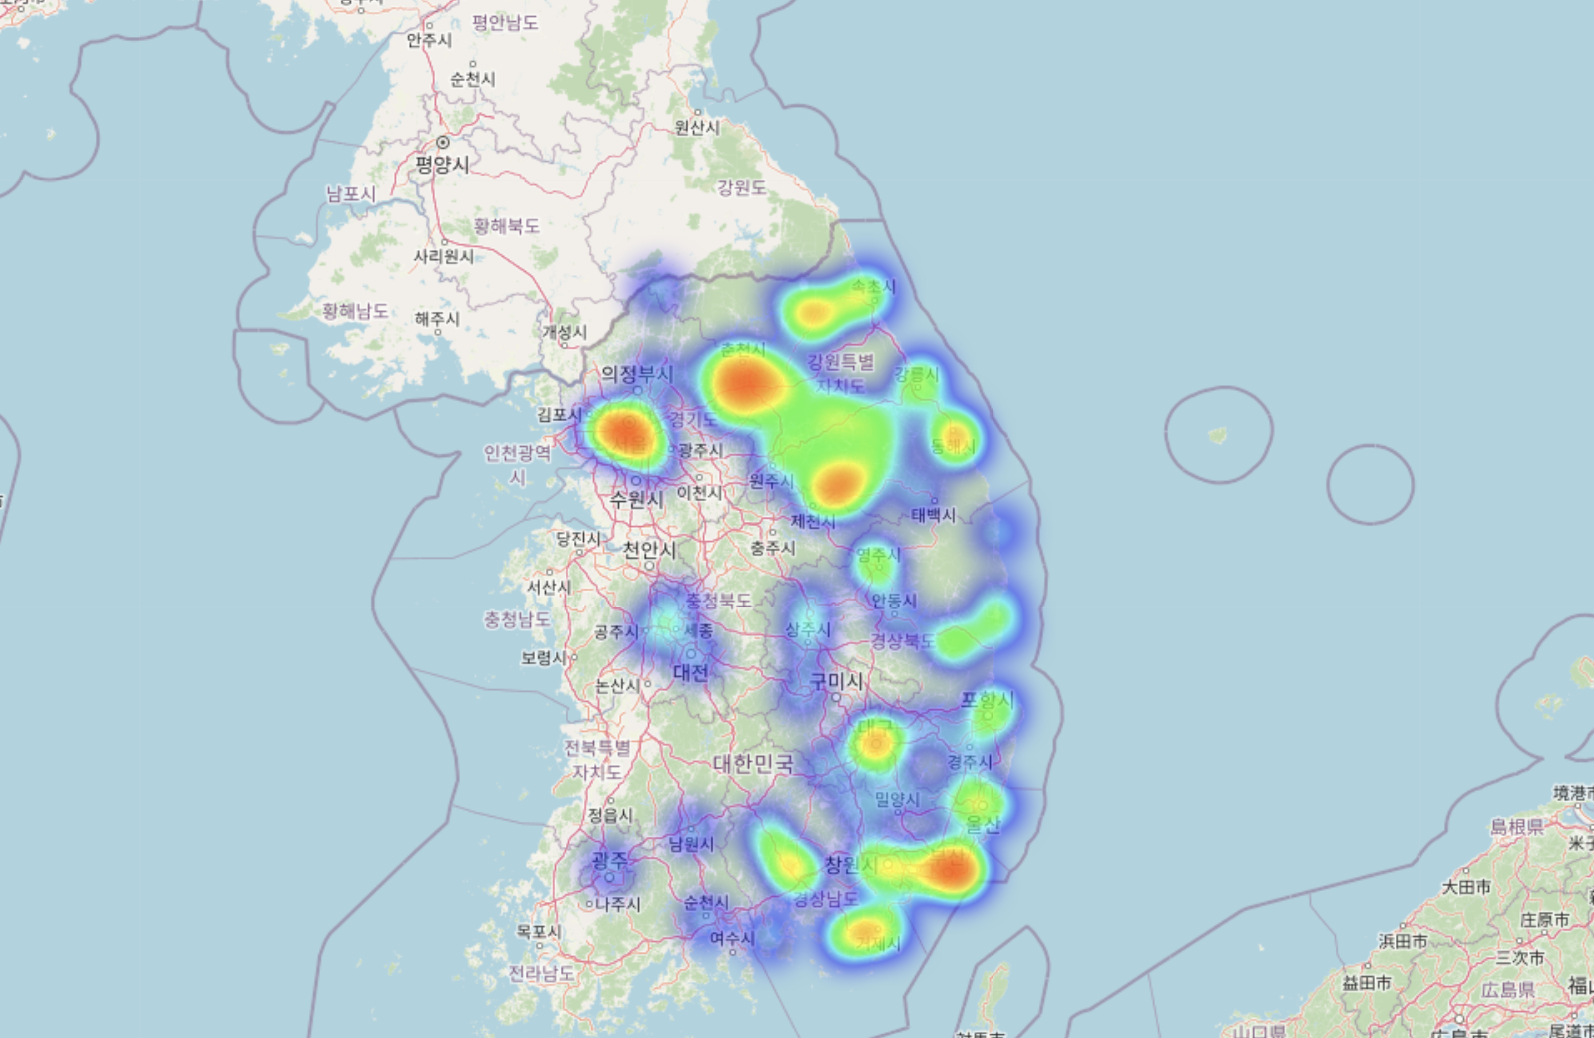

-> 이상값이 존재하는걸 시각화에서 알수있음

#### 2️⃣데이터 결측치 확인하기

In [6]:
data['STORE_NM'].fillna("기록없음", inplace=True)
# 대체 후 데이터프레임을 data_cleaned로 복사 (기존 데이터 보호용)
# 데이터프레임 복사
data_cleaned = data.copy()

# 별도의 범주로 결측치 대체
data_cleaned['LOTNO_ADDR'].fillna("기록없음", inplace=True)
data_cleaned['ROAD_NM_CD'].fillna("기록없음", inplace=True)
data_cleaned['LOTNO_CD'].fillna("기록없음", inplace=True)
data_cleaned['PAYMENT_DT'].fillna("기록없음", inplace=True)
data_cleaned['ROAD_NM_ADDR'].fillna("기록없음",inplace=True)
data_cleaned['PAYMENT_ETC'].fillna("기록없음", inplace=True)



/var/folders/vv/gytv0rd10j5_y7gs0ms_23500000gn/T/ipykernel_26340/3551448378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['STORE_NM'].fillna("기록없음", inplace=True)
/var/folders/vv/gytv0rd10j5_y7gs0ms_23500000gn/T/ipykernel_26340/3551448378.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [7]:
data_cleaned.isnull().sum()

TRAVEL_ID                0
VISIT_AREA_ID            0
ACTIVITY_TYPE_CD         0
ACTIVITY_TYPE_SEQ        0
CONSUME_HIS_SEQ          0
CONSUME_HIS_SNO          0
PAYMENT_NUM              0
BRNO                  2711
STORE_NM                 0
ROAD_NM_ADDR             0
LOTNO_ADDR               0
ROAD_NM_CD               0
LOTNO_CD                 0
PAYMENT_DT               0
PAYMENT_MTHD_SE          0
PAYMENT_AMT_WON          2
PAYMENT_ETC              0
SGG_CD               14386
latitude                 0
longitude                0
dtype: int64

In [8]:
#사업자 등록번호가 필요있을거란생각이 안듬 -> 삭제
data_cleaned = data_cleaned.drop(columns="BRNO")

In [9]:
#PAYMENT_AMT_WON의 결측치에 해당되는 데이터는 2개이므로 삭제
data_cleaned = data_cleaned.dropna(subset=['PAYMENT_AMT_WON'])


In [116]:
# data["SGG_CD"].unique #시군구 코드가 이상함 따라서 그냥 삭제하자
# data_cleaned = data_cleaned.drop(columns="SGG_CD")

### 활동 유형코드 데이터 분포 확인

| **코드 번호** | **활동 유형**           |
|---------------|-------------------------|
| 1             | 취식                    |
| 2             | 쇼핑 / 구매             |
| 3             | 체험 활동 / 입장 및 관람|
| 4             | 단순 구경 / 산책 / 걷기 |
| 5             | 휴식                    |
| 6             | 기타 활동               |
| 7             | 환승/경유               |


In [9]:
!pip install matplotlib


  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 5.9 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.3 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 6.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


- tc_codeb_코드B 테이블 참조
1. 취식
2. 쇼핑/구매
3. 체험활동/ 입장 및 관람
4. 기타활동
위와 같은 순으로 활동유형을 알 수 있었음


ACTIVITY_TYPE_CD
1    10788
2     3103
3     1971
6      490
Name: count, dtype: int64


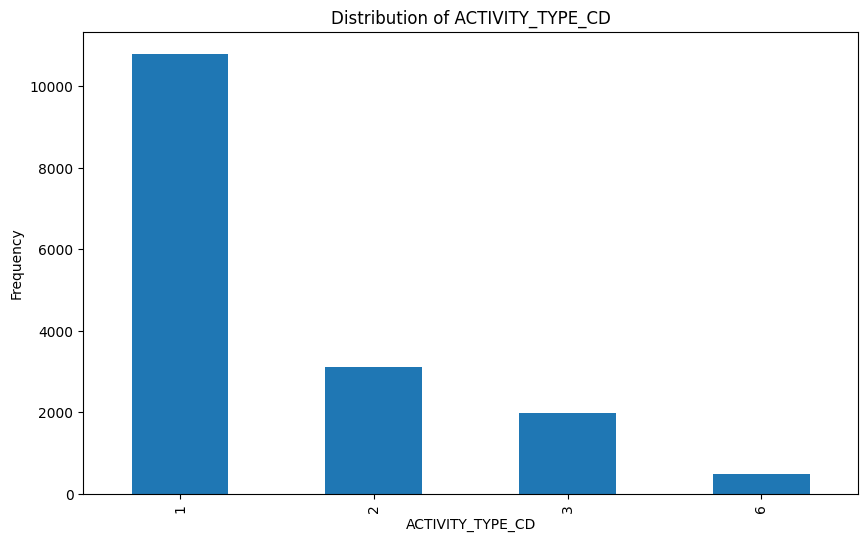

In [10]:
import matplotlib.pyplot as plt

# ACTIVITY_TYPE_CD의 분포 계산
activity_type_distribution = data['ACTIVITY_TYPE_CD'].value_counts()

# 결과 출력
print(activity_type_distribution)

# 분포 시각화
plt.figure(figsize=(10, 6))
activity_type_distribution.plot(kind='bar')
plt.title('Distribution of ACTIVITY_TYPE_CD')
plt.xlabel('ACTIVITY_TYPE_CD')
plt.ylabel('Frequency')
plt.show()

#### 3️⃣기초 통계량 계산

In [12]:
# 수치형 데이터의 기초 통계량 계산
numeric_columns = ['PAYMENT_AMT_WON', 'PAYMENT_NUM']  # 수치형 열을 선택
statistics = data[numeric_columns].describe()

# 기초 통계량 출력
print(statistics)


       PAYMENT_AMT_WON   PAYMENT_NUM
count     1.635000e+04  16352.000000
mean      2.775752e+04      2.547273
std       5.377209e+04      1.475411
min       0.000000e+00      1.000000
25%       8.000000e+03      2.000000
50%       1.700000e+04      2.000000
75%       3.257500e+04      3.000000
max       3.790000e+06     17.000000


## 📊 chat gpt의 통계 해석

### 1. PAYMENT_AMT_WON (결제 금액)
- **count**: 총 16,350개의 결제 내역이 기록되어 있습니다.
- **mean**: 평균 결제 금액은 약 27,757원입니다.
- **std (표준편차)**: 결제 금액의 표준편차는 약 53,772원으로, 결제 금액의 변동이 꽤 큰 편임을 나타냅니다.
- **min**: 최소 결제 금액은 0원입니다. 이는 무료 서비스나 테스트 데이터일 가능성이 있습니다.
- **25% (1사분위수)**: 하위 25%의 결제 금액은 8,000원 이하입니다.
- **50% (중앙값)**: 중간값은 17,000원으로, 결제 금액의 절반이 이 금액 이하입니다.
- **75% (3사분위수)**: 상위 25%의 결제 금액은 32,575원 이상입니다.
- **max**: 최대 결제 금액은 3,790,000원으로, 매우 높은 금액의 결제가 포함되어 있음을 알 수 있습니다.

### 2. PAYMENT_NUM (소비 인원)
- **count**: 총 16,352개의 소비 인원 기록이 있습니다.
- **mean**: 평균 소비 인원은 약 2.55명입니다. 대부분의 결제가 2명 이상에 의해 이루어진 것으로 보입니다.
- **std (표준편차)**: 소비 인원의 표준편차는 1.48명으로, 인원 수에 다소 변동이 있음을 나타냅니다.
- **min**: 최소 소비 인원은 1명입니다.
- **25% (1사분위수)**: 하위 25%의 소비 인원은 2명 이하입니다.
- **50% (중앙값)**: 중간값은 2명으로, 절반의 경우 소비 인원이 2명입니다.
- **75% (3사분위수)**: 상위 25%의 소비 인원은 3명 이상입니다.
- **max**: 최대 소비 인원은 17명으로, 큰 그룹에 의한 소비가 있었음을 나타냅니다.

### 해석
- **결제 금액**의 분포가 넓고, 일부 높은 금액의 결제가 존재함을 알 수 있습니다. 이는 큰 금액의 결제가 전체 평균을 끌어올렸을 가능성이 있습니다.
- **소비 인원**은 대체로 1~3명인 경우가 많으며, 평균적으로 2명 정도가 함께 결제하는 경우가 많습니다.


## 2.  활동 유형 및 소비 패턴 분석
- **활동유형별 소비 분석**: `ACTIVITY_TYPE_CD`를 기준으로 `PAYMENT_AMT_WON`의 합계, 평균, 소비인원(`PAYMENT_NUM`) 등을 분석합니다. 이는 특정 활동 유형이 얼마나 많은 소비를 유발하는지 이해하는 데 도움이 됩니다.
- **방문지별 소비 분석**: `VISIT_AREA_ID`를 기준으로 소비 패턴을 분석합니다. 이를 통해 특정 지역에서의 소비 경향을 파악할 수 있습니다.
- **상호명 분석**: `STORE_NM`을 기준으로 상호별 소비 패턴을 분석하여, 특정 상호에서의 소비가 다른 곳과 비교해 어떠한지 파악할 수 있습니다.

### 💡활동유형별 소비 분석

In [13]:
import pandas as pd

# 활동유형별 결제 금액과 소비 인원의 합계 및 평균을 계산
activity_summary = data.groupby('ACTIVITY_TYPE_CD').agg({
    'PAYMENT_AMT_WON': ['sum', 'mean'],
    'PAYMENT_NUM': ['sum', 'mean']
}).reset_index()

# 컬럼 이름 정리
activity_summary.columns = ['ACTIVITY_TYPE_CD', 'Total_Amount', 'Average_Amount', 'Total_People', 'Average_People']

# 결과 출력
print(activity_summary)


   ACTIVITY_TYPE_CD  Total_Amount  Average_Amount  Total_People  \
0                 1   301495742.0    27949.915825         27386   
1                 2    85774031.0    27651.202772          7592   
2                 3    56214579.0    28520.841705          5461   
3                 6    10351115.0    21124.724490          1214   

   Average_People  
0        2.538561  
1        2.446665  
2        2.770675  
3        2.477551  


-> 활동 유형 1(취식)이 가장 많은 소비를 유발했으며, 활동 유형 3(체험활동)은 평균 결제 금액이 가장 높았습니다.
평균적으로, 각 활동 유형에서 2명 이상의 소비자가 함께 결제하는 경향이 있음을 알 수 있습니다.
활동 유형 6(기타활동)은 상대적으로 적은 금액의 소비가 이루어졌으며, 평균 결제 금액도 가장 낮습니다.

✅ total의 소비는 볼 필요가없을듯

### 💡방문지별 소비 분석

In [14]:
data['VISIT_AREA_ID'].unique()

array([2308200002, 2309010007, 2306030002, ..., 2309150015, 2309150019,
       2309180008])

In [15]:
# 방문지별 결제 금액과 소비 인원의 합계 및 평균을 계산
visit_area_summary = data.groupby('VISIT_AREA_ID').agg({
    'PAYMENT_AMT_WON': ['sum', 'mean'],
    'PAYMENT_NUM': ['sum', 'mean']
}).reset_index()

# 컬럼 이름 정리
visit_area_summary.columns = ['VISIT_AREA_ID', 'Total_Amount', 'Average_Amount', 'Total_People', 'Average_People']

# 결과 출력
print(visit_area_summary)


      VISIT_AREA_ID  Total_Amount  Average_Amount  Total_People  \
0        2304280002       33500.0    16750.000000             5   
1        2304280003       60300.0    15075.000000             8   
2        2304280005       70000.0    35000.000000             7   
3        2304280007       48000.0    48000.000000             1   
4        2304290001      118100.0    19683.333333            18   
...             ...           ...             ...           ...   
1457     2309240003       30000.0    30000.000000             2   
1458     2309240004           0.0        0.000000             2   
1459     2309240005       39500.0    19750.000000             4   
1460     2309240006       10000.0     5000.000000             4   
1461     2309240007       27400.0     6850.000000             8   

      Average_People  
0                2.5  
1                2.0  
2                3.5  
3                1.0  
4                3.0  
...              ...  
1457             2.0  
1458       

### 💡상호명 소비 분석

In [16]:
# 상호별 결제 금액과 소비 인원의 합계 및 평균을 계산
store_summary = data.groupby('STORE_NM').agg({
    'PAYMENT_AMT_WON': ['sum', 'mean'],
    'PAYMENT_NUM': ['sum', 'mean']
}).reset_index()

# 컬럼 이름 정리
store_summary.columns = ['STORE_NM', 'Total_Amount', 'Average_Amount', 'Total_People', 'Average_People']

# 결과 출력
print(store_summary)


             STORE_NM  Total_Amount  Average_Amount  Total_People  \
0          도째비골 스카이밸리        2000.0          2000.0             2   
1       동해 도째비골 스카이밸리        1000.0          1000.0             2   
2             막둥이네양곱창       61000.0         61000.0             2   
3              박가네돌판찜       33000.0         33000.0             2   
4         속초닭강정(속초닭집)       22000.0         22000.0             2   
...               ...           ...             ...           ...   
9460             힐튼부산       99000.0         99000.0             3   
9461     힐튼호텔 경주 실크로드      273400.0        273400.0             3   
9462           힘력풍천장어       19000.0         19000.0             1   
9463               힙스       19000.0         19000.0             2   
9464  （주）즐거운세상롯데몰동부산점       41600.0         41600.0             2   

      Average_People  
0                2.0  
1                2.0  
2                2.0  
3                2.0  
4                2.0  
...              ...  
9460      

1. 시각화 활용

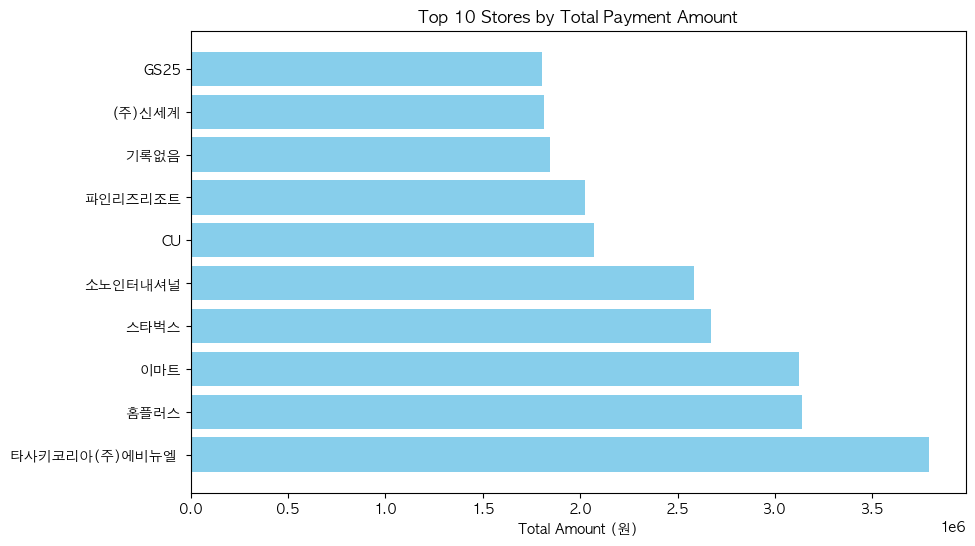

In [18]:
import matplotlib.pyplot as plt
import platform

# Apple 시스템에서 폰트를 'AppleGothic'으로 설정
if platform.system() == 'Darwin': 
    plt.rc('font', family='AppleGothic')

# 음수 마이너스 기호가 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# 상위 10개 상호의 결제 금액 시각화
top_10_stores = store_summary.sort_values(by='Total_Amount', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_stores['STORE_NM'], top_10_stores['Total_Amount'], color='skyblue')
plt.xlabel('Total Amount (원)')
plt.title('Top 10 Stores by Total Payment Amount')
plt.show()


2.상위/하위 분석

In [19]:
# 결제 금액이 큰 상위 10개 상호
top_stores = store_summary.sort_values(by='Average_Amount', ascending=False).head(10)
print(top_stores)

# 결제 금액이 작은 하위 10개 상호
bottom_stores = store_summary.sort_values(by='Average_Amount', ascending=True).head(10)
print(bottom_stores)


             STORE_NM  Total_Amount  Average_Amount  Total_People  \
8156   타사키코리아(주)에비뉴엘      3790000.0       3790000.0             2   
6835        재경가구산업(주)     1600000.0       1600000.0             2   
8111    크리스챤디올(주롯데부산점     1450000.0       1450000.0             2   
299   (주)코스트코 코리아 부산점     1121820.0       1121820.0             5   
1075              고구려      944000.0        944000.0             3   
571           SIGNIEL      916000.0        916000.0             4   
6438      유한회사 나이키코리아     1309000.0        654500.0             4   
2388           동부숯불갈비      622000.0        622000.0            10   
4743             솔향대게      582000.0        582000.0             5   
6213          우천축산공판장      566000.0        566000.0             8   

      Average_People  
8156             2.0  
6835             2.0  
8111             2.0  
299              5.0  
1075             3.0  
571              4.0  
6438             2.0  
2388            10.0  
4743             5.0  
6213      

3. 상호명 그룹화는 조금 힘들어보임

In [141]:

# data['Category'] = data['STORE_NM'].apply(lambda x: '식당' if '식당' in x or '레스토랑' in x else 
#                                                  '호텔' if '호텔' in x else 
#                                                  '쇼핑몰' if '몰' in x else '기타')

# # 카테고리별 소비 분석
# category_summary = data.groupby('Category').agg({
#     'PAYMENT_AMT_WON': ['sum', 'mean'],
#     'PAYMENT_NUM': ['sum', 'mean']
# }).reset_index()

# print(category_summary)


4. 파레토 분석

In [20]:
# 결제 금액 기준으로 상호 정렬
sorted_stores = store_summary.sort_values(by='Total_Amount', ascending=False)

# 결제 금액의 누적 백분율 계산
sorted_stores['Cumulative_Percentage'] = sorted_stores['Total_Amount'].cumsum() / sorted_stores['Total_Amount'].sum() * 100

# 전체 결제 금액의 80%를 차지하는 상위 상호 필터링
top_80_percent_stores = sorted_stores[sorted_stores['Cumulative_Percentage'] <= 80]
print(top_80_percent_stores)


                    STORE_NM  Total_Amount  Average_Amount  Total_People  \
8156          타사키코리아(주)에비뉴엘      3790000.0    3.790000e+06             2   
9200                    홈플러스     3137330.0    6.033327e+04           147   
6535                     이마트     3124830.0    8.445486e+04            98   
4928                    스타벅스     2669850.0    1.289783e+04           474   
4606                 소노인터내셔널     2581900.0    4.164355e+04           197   
...                      ...           ...             ...           ...   
236   (주)유성티엔에스 서여주(양평방향)휴게소       34500.0    3.450000e+04             4   
6326                      월가       34500.0    3.450000e+04             2   
2202                  더블유(W)       34500.0    1.725000e+04             5   
4759                  송도제일밀면       34500.0    3.450000e+04             4   
1593                꼬육꼬밥 강릉점       34500.0    3.450000e+04             1   

      Average_People  Cumulative_Percentage  
8156        2.000000               0.8351

In [21]:
# 상호별 결제 금액과 소비 인원의 합계 및 평균을 계산
store_summary = data.groupby('STORE_NM').agg({
    'PAYMENT_AMT_WON': ['sum', 'mean'],
    'PAYMENT_NUM': ['sum', 'mean']
}).reset_index()

# 컬럼 이름 정리
store_summary.columns = ['STORE_NM', 'Total_Amount', 'Average_Amount', 'Total_People', 'Average_People']

# 결과 출력
print(store_summary)


             STORE_NM  Total_Amount  Average_Amount  Total_People  \
0          도째비골 스카이밸리        2000.0          2000.0             2   
1       동해 도째비골 스카이밸리        1000.0          1000.0             2   
2             막둥이네양곱창       61000.0         61000.0             2   
3              박가네돌판찜       33000.0         33000.0             2   
4         속초닭강정(속초닭집)       22000.0         22000.0             2   
...               ...           ...             ...           ...   
9460             힐튼부산       99000.0         99000.0             3   
9461     힐튼호텔 경주 실크로드      273400.0        273400.0             3   
9462           힘력풍천장어       19000.0         19000.0             1   
9463               힙스       19000.0         19000.0             2   
9464  （주）즐거운세상롯데몰동부산점       41600.0         41600.0             2   

      Average_People  
0                2.0  
1                2.0  
2                2.0  
3                2.0  
4                2.0  
...              ...  
9460      

## 3. **시간 기반 분석**

- **결제일시 분석**: `PAYMENT_DT`를 사용하여 시간에 따른 소비 패턴을 분석합니다.

In [31]:
data['TRAVEL_ID'].nunique()

2545

##### 관광객 id가 2545개 따라서 plotly를 사용해보자 

In [37]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 10.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


#### 🕐 시간대별

In [38]:
import plotly.express as px
import plotly.graph_objects as go

# 결제일시를 datetime 형식으로 변환
data['PAYMENT_DT'] = pd.to_datetime(data['PAYMENT_DT'])

# 시간대별 소비 분석
data['Hour'] = data['PAYMENT_DT'].dt.hour
hourly_data = data.groupby(['TRAVEL_ID', 'Hour'])['PAYMENT_AMT_WON'].sum().reset_index()

# 인터랙티브한 시간대별 소비 패턴 그래프 생성
fig = px.line(hourly_data, x='Hour', y='PAYMENT_AMT_WON', color='TRAVEL_ID', title='Time of Day Consumption Pattern by TRAVEL_ID')
fig.update_layout(xaxis_title='Hour of Day', yaxis_title='Total Consumption')

# 그래프를 HTML 파일로 저장
fig.write_html("time_of_day_consumption_by_travel_id.html")

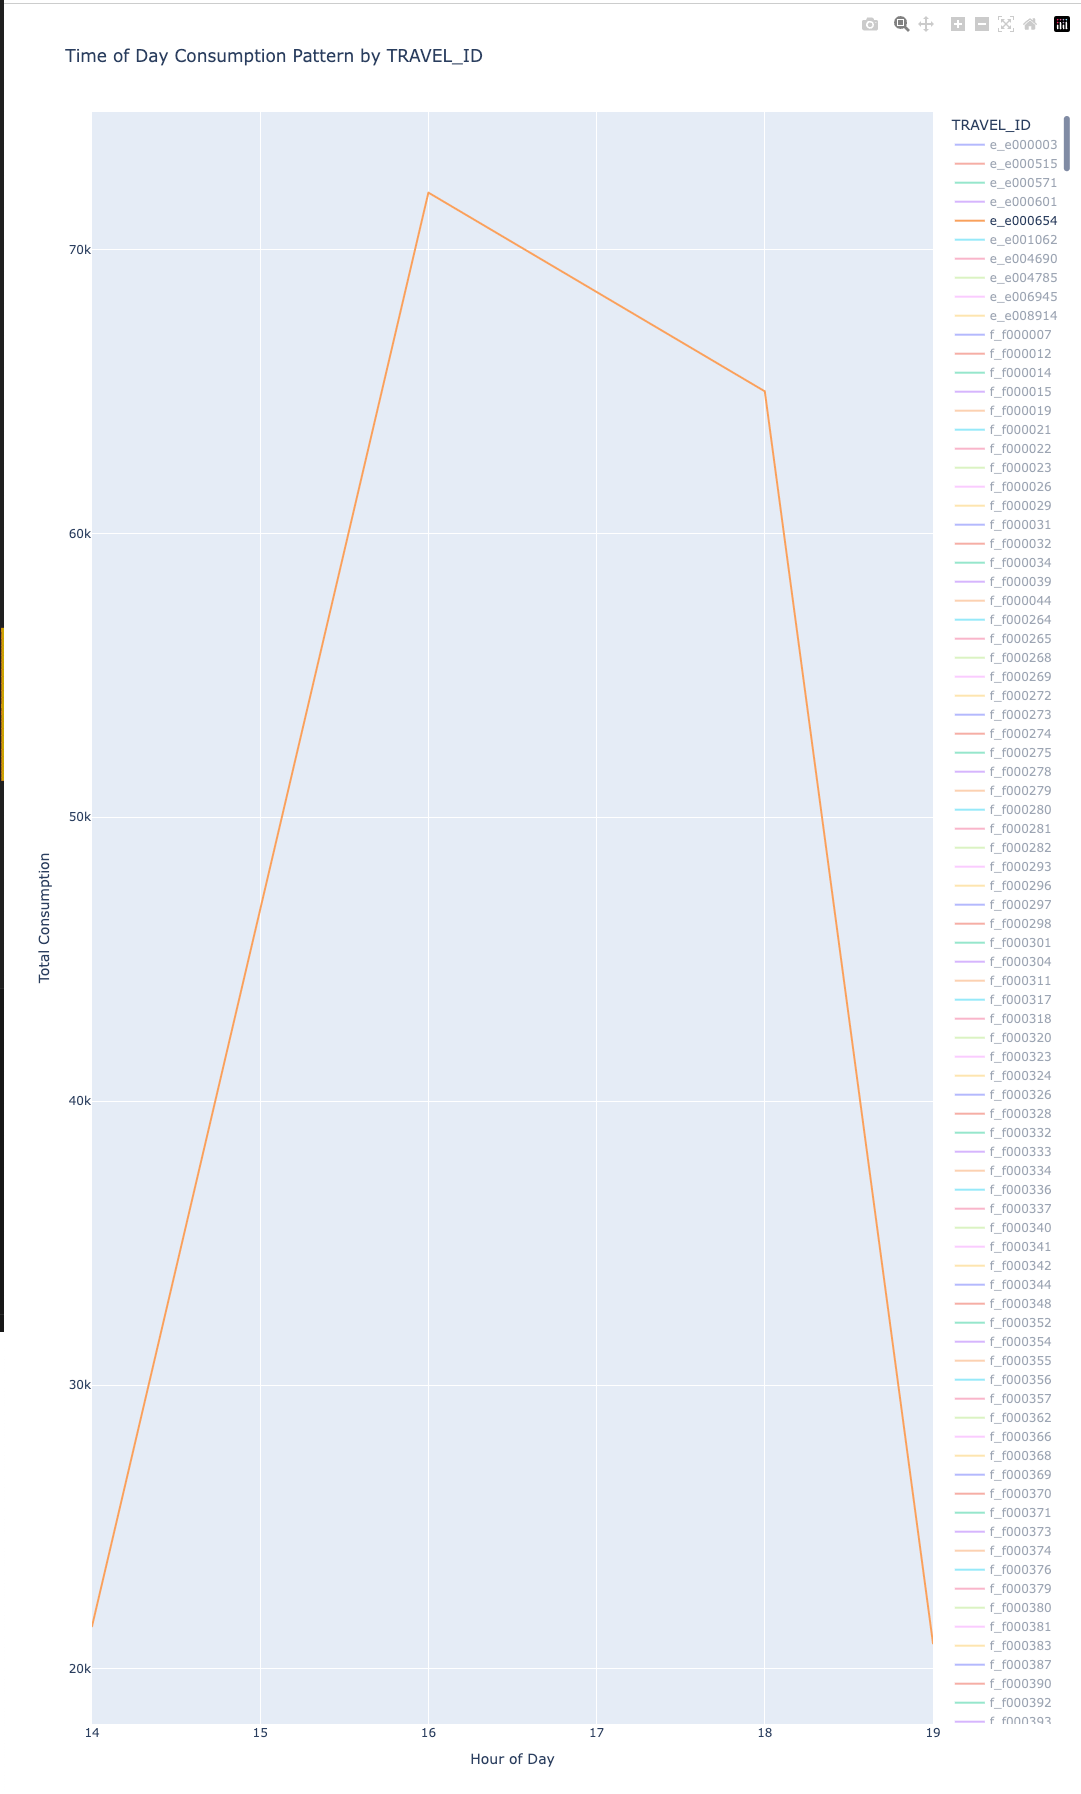

#### 💡그래서 제일 많이 소비하는 시간은 언제일까?

In [41]:
# 시간대와 TRAVEL_ID별 소비 금액의 평균 계산
hourly_avg_data = data.groupby(['Hour', 'TRAVEL_ID'])['PAYMENT_AMT_WON'].sum().reset_index()
hourly_avg_per_travel_id = hourly_avg_data.groupby('Hour')['PAYMENT_AMT_WON'].mean().reset_index()

# 가장 많이 소비된 시간 찾기 (평균 소비 금액 기준)
max_hour_avg = hourly_avg_per_travel_id.loc[hourly_avg_per_travel_id['PAYMENT_AMT_WON'].idxmax()]

print(f"가장 많이 소비된 시간대는 {max_hour_avg['Hour']}시이며, 해당 시간대의 소비 금액 평균은 {max_hour_avg['PAYMENT_AMT_WON']}원입니다.")


가장 많이 소비된 시간대는 1.0시이며, 해당 시간대의 소비 금액 평균은 57803.15789473684원입니다.


## 4.**지역 기반 분석**

- **시군구코드(SGG_CD) 분석**: `SGG_CD`를 사용하여 지역별 소비 내역을 분석합니다. 이를 통해 특정 지역에서의 소비가 다른 지역과 비교해 어떻게 다른지 이해할 수 있습니다.

In [44]:
!pip install --upgrade nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 10.4 MB/s eta 0:00:00
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 kB 18.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [46]:
data.columns

Index(['TRAVEL_ID', 'VISIT_AREA_ID', 'ACTIVITY_TYPE_CD', 'ACTIVITY_TYPE_SEQ',
       'CONSUME_HIS_SEQ', 'CONSUME_HIS_SNO', 'PAYMENT_NUM', 'BRNO', 'STORE_NM',
       'ROAD_NM_ADDR', 'LOTNO_ADDR', 'ROAD_NM_CD', 'LOTNO_CD', 'PAYMENT_DT',
       'PAYMENT_MTHD_SE', 'PAYMENT_AMT_WON', 'PAYMENT_ETC', 'SGG_CD',
       'latitude', 'longitude', 'Hour', 'Weekday', 'Month'],
      dtype='object')

In [48]:
#지역 및 관광객별 총 소비 금액 계산
regional_consumption = data.groupby(['SGG_CD','TRAVEL_ID'])['PAYMENT_AMT_WON'].sum().reset_index()
# 지역별 평균 소비 금액 계산
regional_avg_consumption = regional_consumption.groupby('SGG_CD')['PAYMENT_AMT_WON'].mean().reset_index()


In [49]:
# 가장 많이 소비된 지역 찾기 (평균 소비 금액 기준)
max_region_avg = regional_avg_consumption.loc[regional_avg_consumption['PAYMENT_AMT_WON'].idxmax()]

print(f"가장 많이 소비된 지역은 시군구코드 {max_region_avg['SGG_CD']}이며, 해당 지역의 평균 소비 금액은 {max_region_avg['PAYMENT_AMT_WON']}원입니다.")

가장 많이 소비된 지역은 시군구코드 4282033000.0이며, 해당 지역의 평균 소비 금액은 316014.28571428574원입니다.


"4282033000","42","820","330","00",강원도,고성군,토성면,""

In [67]:
import pandas as pd

data = pd.read_csv("./data/raw/train/TL_csv/tn_activity_consume_his_활동소비내역_F.csv")


In [89]:
# 결측값을 빈 문자열로 대체
data['LOTNO_ADDR'] = data['LOTNO_ADDR'].fillna('주소적혀있지않음')

# 도로명 주소에서 시 정보 추출하는 함수
def extract_city(road_addr):
    return road_addr.split(' ')[0] if road_addr else 'Unknown'


In [90]:
# 시 정보 추출
data['City'] = data['LOTNO_ADDR'].apply(extract_city)

# 지역 및 TRAVEL_ID별 거래 횟수 계산
regional_frequency = data.groupby(['City', 'TRAVEL_ID']).size().reset_index(name='Transaction_Count')

# 각 시에서의 고유한 TRAVEL_ID 수 계산
unique_travel_id_count = regional_frequency.groupby('City')['TRAVEL_ID'].nunique().reset_index(name='Unique_Travel_ID_Count')


In [91]:
data['City'].nunique()

19

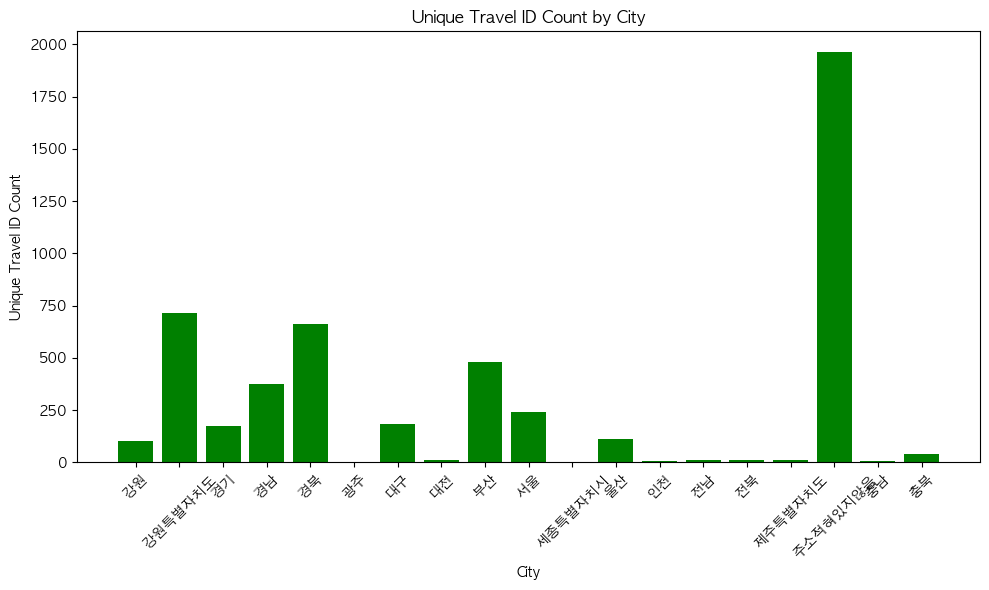

In [92]:
# 시각화 (Matplotlib)
plt.figure(figsize=(10, 6))
plt.bar(unique_travel_id_count['City'], unique_travel_id_count['Unique_Travel_ID_Count'], color='green')
plt.xlabel('City')
plt.ylabel('Unique Travel ID Count')
plt.title('Unique Travel ID Count by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 📊 지역기반 분석을 진행했을 때 주로 강원도에서 소비가 높다는것을 알 수 있음
**but 주소가 안적혀있는경우가 많아서 확실하지않음 (idk)**

## 5.**군집 분석**
군집 분석: ACTIVITY_TYPE_CD, VISIT_AREA_ID, PAYMENT_MTHD_SE 등을 기준으로 군집화를 시도하여 유사한 소비 패턴을 가진 그룹을 찾을 수 있습니다.

In [97]:
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 10.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [118]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

data.replace('',pd.NA, inplace=True)
data.dropna(inplace=True)

data_grouped = data.groupby('TRAVEL_ID').agg({
    'PAYMENT_AMT_WON' : 'sum',
    'ACTIVITY_TYPE_CD' : lambda x : ''.join(str(i) for i in x),
    'City' : lambda x : ' '.join(str(i) for i in x),
    'PAYMENT_MTHD_SE' : lambda x : ' '.join(str(i) for i in x)
}).reset_index()

In [140]:
# 데이터 전처리 및 원-핫 인코딩
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[['ACTIVITY_TYPE_CD', 'City', 'PAYMENT_MTHD_SE']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())
data_encoded = pd.concat([data[['PAYMENT_AMT_WON']].reset_index(drop=True), encoded_df], axis=1)

/Users/rirakang/virtual/envev/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.



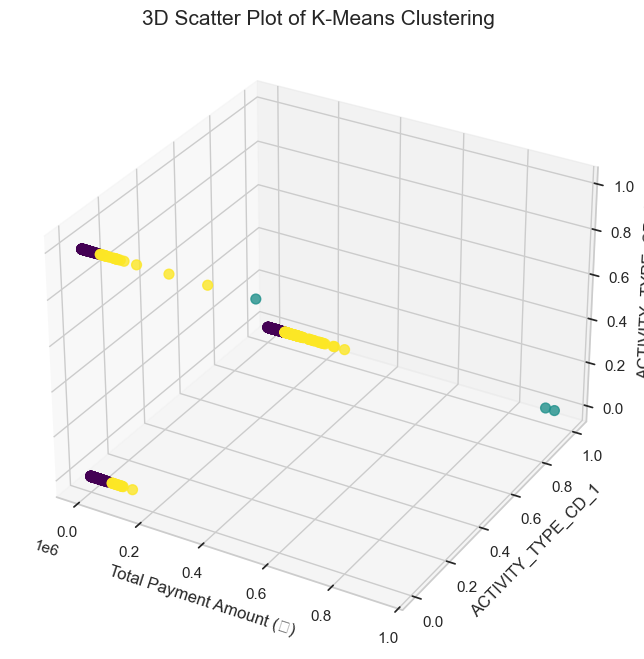

In [141]:
# KMeans 군집화
kmeans = KMeans(n_clusters=3, random_state=46)
data_encoded['Cluster'] = kmeans.fit_predict(data_encoded)

# 3차원 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
scatter = ax.scatter(
    data_encoded['PAYMENT_AMT_WON'],  # X축: 총 결제 금액
    data_encoded[encoded_df.columns[0]],  # Y축: 첫 번째 원-핫 인코딩된 변수
    data_encoded[encoded_df.columns[1]],  # Z축: 두 번째 원-핫 인코딩된 변수
    c=data_encoded['Cluster'],  # 각 점의 색상을 군집에 따라 다르게
    cmap='viridis',  # 색상 맵
    s=50,  # 점 크기
    alpha=0.8  # 점의 투명도
)
# 축 레이블 및 제목 설정
ax.set_xlabel('Total Payment Amount (원)', fontsize=12)
ax.set_ylabel(encoded_df.columns[0], fontsize=12)
ax.set_zlabel(encoded_df.columns[1], fontsize=12)
plt.title('3D Scatter Plot of K-Means Clustering', fontsize=15)

plt.show()

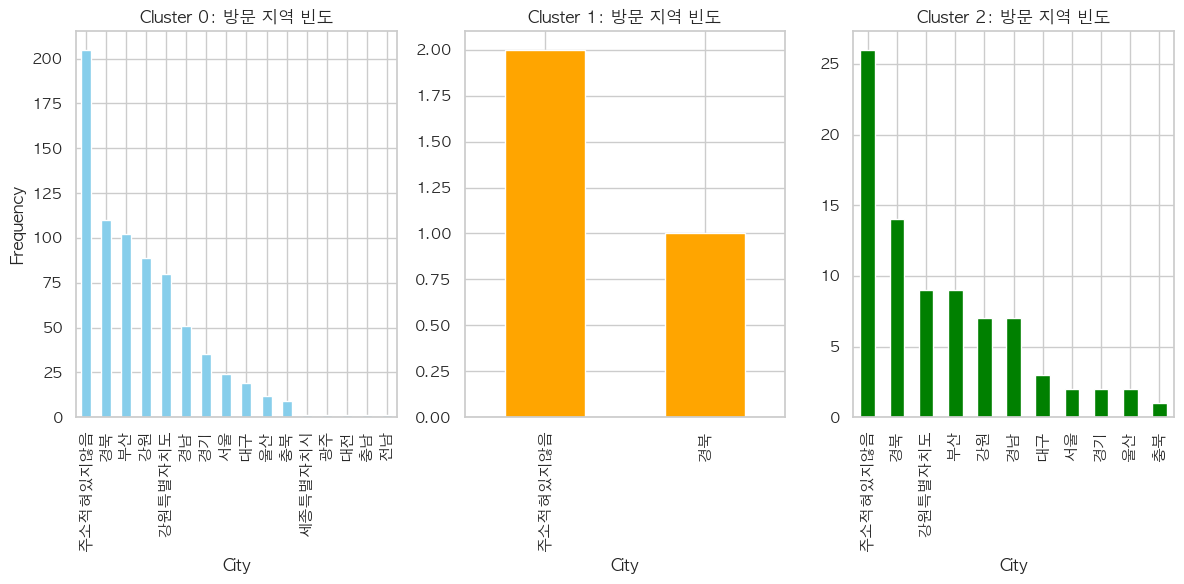

In [142]:
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정
if platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    plt.rc('font', family='Malgun Gothic')
else:  # Linux
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 군집별로 데이터 나누기
cluster_0 = data_encoded[data_encoded['Cluster'] == 0]
cluster_1 = data_encoded[data_encoded['Cluster'] == 1]
cluster_2 = data_encoded[data_encoded['Cluster'] == 2]

# 원본 데이터와 군집 결과 결합
data['Cluster'] = data_encoded['Cluster']

# 각 군집별로 방문 지역 빈도 계산
visit_area_cluster_0 = data[data['Cluster'] == 0]['City'].value_counts()
visit_area_cluster_1 = data[data['Cluster'] == 1]['City'].value_counts()
visit_area_cluster_2 = data[data['Cluster'] == 2]['City'].value_counts()

# 결과 시각화
plt.figure(figsize=(12, 6))

# Cluster 0 지역 빈도 시각화
plt.subplot(1, 3, 1)
visit_area_cluster_0.plot(kind='bar', color='skyblue')
plt.title('Cluster 0: 방문 지역 빈도')
plt.xlabel('City')
plt.ylabel('Frequency')

# Cluster 1 지역 빈도 시각화
plt.subplot(1, 3, 2)
visit_area_cluster_1.plot(kind='bar', color='orange')
plt.title('Cluster 1: 방문 지역 빈도')
plt.xlabel('City')

# Cluster 2 지역 빈도 시각화
plt.subplot(1, 3, 3)
visit_area_cluster_2.plot(kind='bar', color='green')
plt.title('Cluster 2: 방문 지역 빈도')
plt.xlabel('City')

plt.tight_layout()
plt.show()


### ✅ 이후 각 csv에대해 데이터분석을 진행후 feature engineering을 진행
**알고리즘에는 한테이블이 들어가야기 때문(내가 아는 지식에서는)**

##### 군집화도 모든 테이블이 정리된다음 해야겠음 